# Lecture2 First Neural Network
#### MPATE-GE 2039 - DM-GY 9103 Deep Learning for Media

---


This is a class exercise for you to follow during the lecture. Notebook based on the companion materials of:

<blockquote>
"Deep Learning with Python", Second Edition by  F. Chollet, 2021.
</blockquote>

## [1] A first look at a neural network

### 1.1 Loading the MNIST dataset in Keras

A simple problem: classify hand written digits.

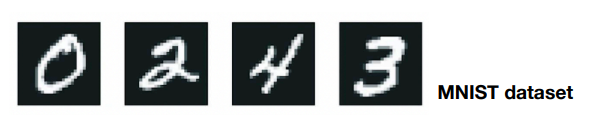

**Data**:
single image 28x28 pixels
with 10 binary labels (digits 0, 1, ..., 9)

**Training set**: 60,000 images

**Test set:** 10,000 images

In [49]:
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [50]:
type(train_images)

numpy.ndarray

In [51]:
train_images.shape

(60000, 28, 28)

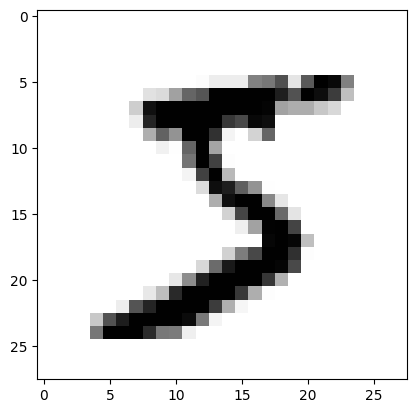

In [ ]:
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


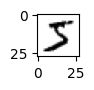

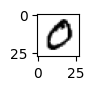

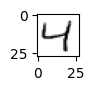

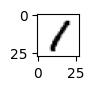

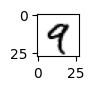

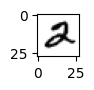

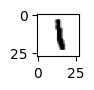

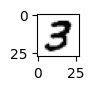

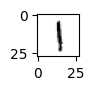

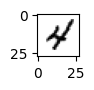

In [ ]:
plt.figure()
for i in range(10):
  digit = train_images[i]
  fig = plt.subplot(1, 10, i + 1)
  plt.imshow(digit, cmap=plt.cm.binary)
  plt.show()

In [ ]:
type(train_labels)

numpy.ndarray

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### 1.2 Define the model architecture

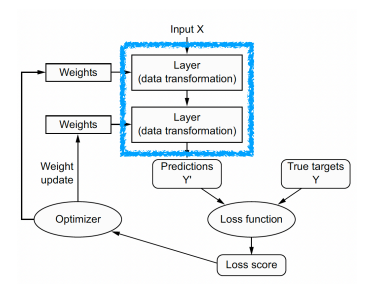

$\text{output} = \text{relu}(\text{dot}(\text{input}, W)+b)$

1. A **dot product** between two matrices (the input, and $W$).
2. An **addition**, between the resulting matrix and a vector $b$.
3. A **relu operation** (rectified linear unit). relu(x) = max(0, x).

A geometric interprelation of a dense layer can be represented as

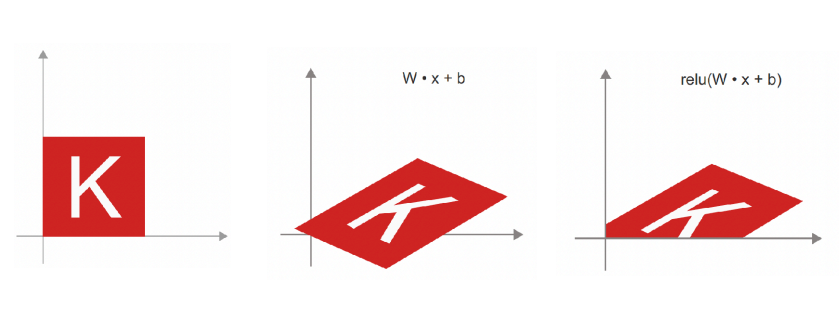

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

### 1.3 Define the loss function and optimizer (the compilation step)

The `.compile()` operation is Tensorflow-specific, but we need a step like this anyway to set the loss function and the optimizer.

- optimizer: how to update weights
- loss: how to calculate loss score
- metrics: optional

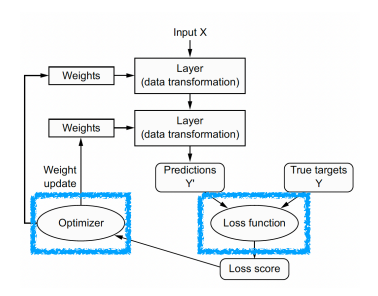

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### 1.4 Preparing the image data (Normalization)

With this model, we don't care the (height, width) situation - the 2D-ness of the image.

The pixel intensity is originally represented as numbers in [0, 255]. For some computational reason, we'll shrink it to [0, 1].

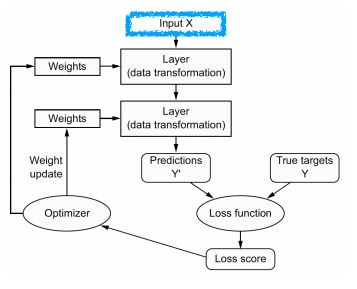

In [ ]:
flatten_train_images = train_images.reshape((60000, 28 * 28))
flatten_train_images = flatten_train_images.astype("float32") / 255

flatten_test_images = test_images.reshape((10000, 28 * 28))
flatten_test_images = flatten_test_images.astype("float32") / 255

### 1.5 Training/Fitting the model

In [ ]:
model.fit(flatten_train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 13ms/step - loss: 0.2636 - accuracy: 0.9241
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.1065 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0699 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0506 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0378 - accuracy: 0.9884


### 1.6 Using the model to make predictions

Test dataset and labels

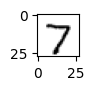

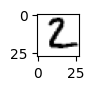

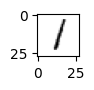

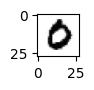

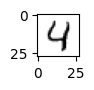

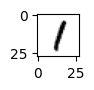

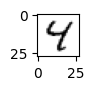

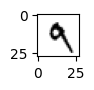

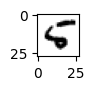

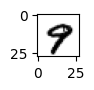

In [ ]:
test_digits = test_images[0:10]
for i, digit in enumerate(test_digits):
  fig = plt.subplot(1, 10, i + 1)
  plt.imshow(digit, cmap=plt.cm.binary)
  plt.show()

Use the trained model to make prediction

1/1 [==============================] - 0s 36ms/step


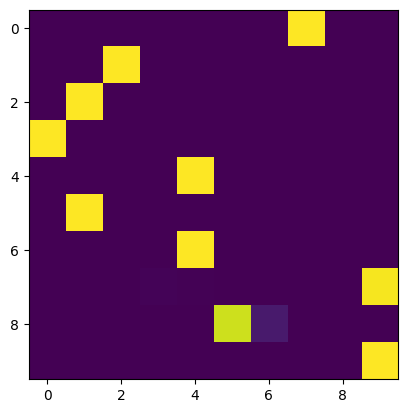

In [ ]:
predictions = model.predict(flatten_test_images[0:10])
plt.imshow(predictions)

In [ ]:
for i in range(10):
  predict = predictions[i]
  print(f'predict label: {predict.argmax()}, actual label: {test_labels[i]}')

predict label: 7, actual label: 7
predict label: 2, actual label: 2
predict label: 1, actual label: 1
predict label: 0, actual label: 0
predict label: 4, actual label: 4
predict label: 1, actual label: 1
predict label: 4, actual label: 4
predict label: 9, actual label: 9
predict label: 5, actual label: 5
predict label: 9, actual label: 9


Text(0.5, 1.0, 'Predicted probabilty for the first test image')

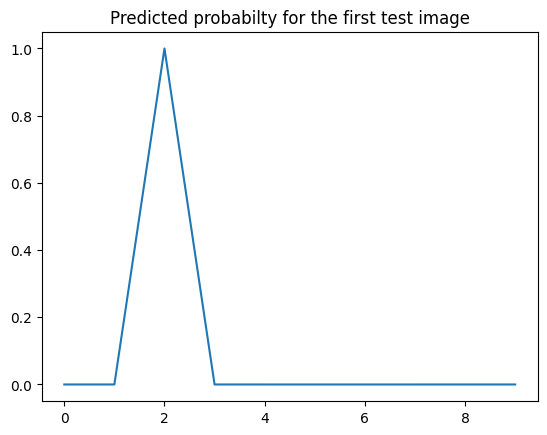

In [ ]:
plt.plot(predictions[1])
plt.title('Predicted probabilty for the first test image')

### 1.7 Evaluating the model on new data

In [ ]:
test_loss, test_acc = model.evaluate(flatten_test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0661 - accuracy: 0.9796
test_acc: 0.9796000123023987


## [2] Data representations for neural networks

The data we used is contained in multi-dimensional arrays.

Those containers of numbers are called **Tensors**

Tensors have different **ranks** (i.e, number of axes)

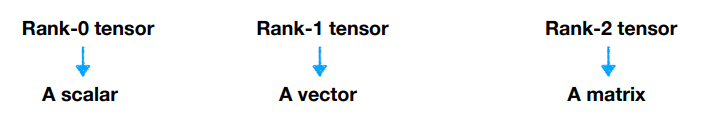

### 2.1 Scalars (rank-0 tensors)

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

1

### 2.2 Vectors (rank-1 tensors)

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

### 2.3 Matrices (rank-2 tensors)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [ ]:
x.ndim

2

### 2.4 Rank-3 and higher-rank tensors

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [ ]:
x.ndim

3

### 2.5 Tensor in MNIST

Tensors are characterized by:
- Number of axes (rank)
- Shape
- Data Type (dtype)

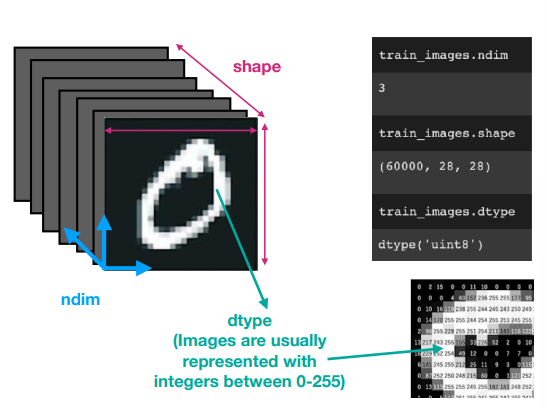

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.ndim

3

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.dtype

dtype('uint8')

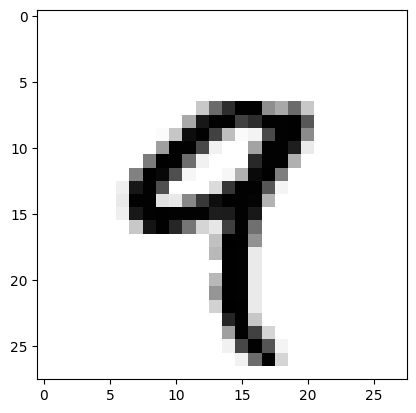

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels[4]

9

### 2.6 Manipulating tensors in NumPy

#### 2.6.1 Select a particular element

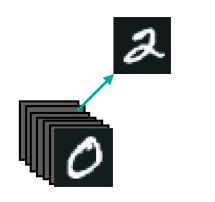

In [ ]:
digit = train_images[4]
digit.shape

(28, 28)

#### 2.6.2 Select a slice of element

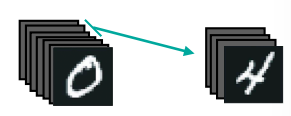

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

#### 2.6.3 Select a slice with a portion of an element

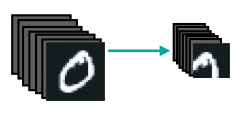

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [ ]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

### 2.7 Batches Processing

Deep Learning models can’t process large amounts of data at once, so we fit them batches. Batches are slices of data

First batch

In [ ]:
batch = train_images[:128]

Second batch

In [ ]:
batch = train_images[128:256]

$n$th batch

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

Remember in Section 1.5, we also use `batch` to trained the model

`model.fit(flatten_train_images, train_labels, epochs=5, batch_size=128)`

Here we set the batch size to be 128

### 2.8 Real-world Tensors

#### 2.8.1 Rank-2 Tensor (Matrix)

(samples, features)

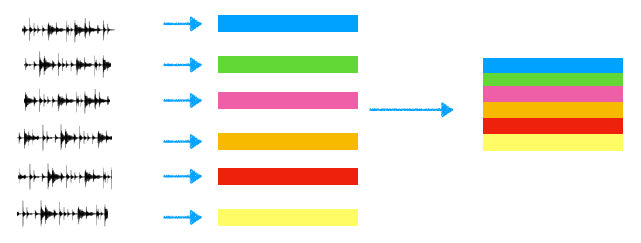

#### 2.8.2 Rank-3 Tensor

(samples, features, time)

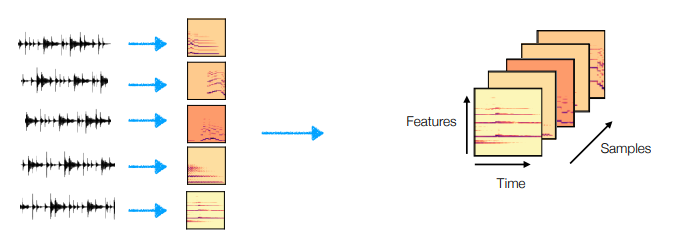

(sample. hight, width)

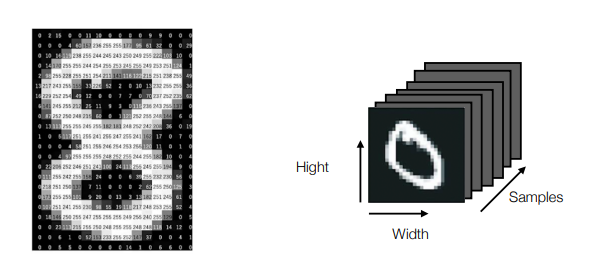

#### 2.8.3 Rank-4 tensor

(samples, hight, width, channels)

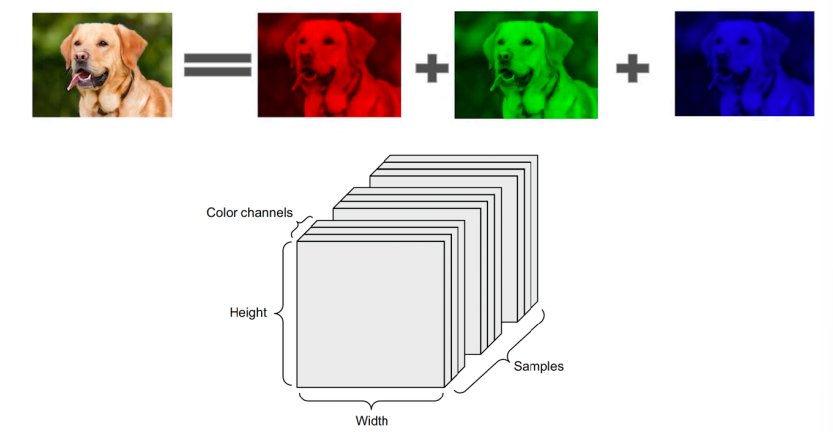

## [3] Tensor operations

tensor operation is way more faster than traditional python code

### 3.1 Element-wise operations in Tensor


#### 3.1.1 Add Operation

In [25]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

#### 3.1.2 ReLU Operation

In [24]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

#### 3.1.3 Comparison between Tensor and Naive Operation

In [30]:
import time
x = np.random.random((20, 100))
y = np.random.random((20, 100))

In [31]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Naive Operation Took: {0:.2f} s".format(time.time() - t0))

Naive Operation Took: 2.08 s


In [32]:
t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Tensor Operations Took: {0:.2f} s".format(time.time() - t0))

Tensor Operations Took: 0.02 s


### 3.2 Broadcasting

In [8]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))
y.shape

(10,)

In [9]:
y

array([0.4605224 , 0.42723319, 0.84619359, 0.60305503, 0.82852443,
       0.40661488, 0.79199727, 0.77011703, 0.29899949, 0.80070592])

#### 3.2.1 Expand Dimension

In [10]:
y = np.expand_dims(y, axis=0)
y.shape

(1, 10)

In [11]:
y

array([[0.4605224 , 0.42723319, 0.84619359, 0.60305503, 0.82852443,
        0.40661488, 0.79199727, 0.77011703, 0.29899949, 0.80070592]])

#### 3.2.2 Concatenate

In [12]:
Y = np.concatenate([y] * 32, axis=0)
Y.shape

(32, 10)

In [13]:
Y

array([[0.4605224 , 0.42723319, 0.84619359, 0.60305503, 0.82852443,
        0.40661488, 0.79199727, 0.77011703, 0.29899949, 0.80070592],
       [0.4605224 , 0.42723319, 0.84619359, 0.60305503, 0.82852443,
        0.40661488, 0.79199727, 0.77011703, 0.29899949, 0.80070592],
       [0.4605224 , 0.42723319, 0.84619359, 0.60305503, 0.82852443,
        0.40661488, 0.79199727, 0.77011703, 0.29899949, 0.80070592],
       [0.4605224 , 0.42723319, 0.84619359, 0.60305503, 0.82852443,
        0.40661488, 0.79199727, 0.77011703, 0.29899949, 0.80070592],
       [0.4605224 , 0.42723319, 0.84619359, 0.60305503, 0.82852443,
        0.40661488, 0.79199727, 0.77011703, 0.29899949, 0.80070592],
       [0.4605224 , 0.42723319, 0.84619359, 0.60305503, 0.82852443,
        0.40661488, 0.79199727, 0.77011703, 0.29899949, 0.80070592],
       [0.4605224 , 0.42723319, 0.84619359, 0.60305503, 0.82852443,
        0.40661488, 0.79199727, 0.77011703, 0.29899949, 0.80070592],
       [0.4605224 , 0.42723319, 0.8461935

#### 3.2.3 Matrix and Vector Addition

In [40]:
x = np.random.random((1000, 10))
y = np.random.random((10))

In [41]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [42]:
t0 = time.time()
for _ in range(1000):
    z = naive_add_matrix_and_vector(x, y)
print("Naive Operations Took: {0:.2f} s".format(time.time() - t0))

Naive Operations Took: 5.68 s


In [43]:
t0 = time.time()
for _ in range(1000):
    z = x+y
print("Tensor Operations Took: {0:.2f} s".format(time.time() - t0))

Tensor Operations Took: 0.04 s


### 3.3 Matrix product operation in Tensor

#### 3.3.1 vector dot

In [22]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)
z

8.89127986529909

In [44]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [45]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [46]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [47]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### 3.4 Tensor reshaping

In [52]:
train_images = train_images.reshape((60000, 28 * 28))

In [53]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [54]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [55]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)